In [14]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

In [15]:
def max_abs_scale(series):
    return series / series.abs().max()

bar_width = 0.11
text_order = ["1Ko", "5Ko", "12Ko"]


dfe = pd.read_csv("./result/energy.csv")

dfm = pd.read_csv("./result/result.csv")  

# dfe.head(30)

Energy data frame pre-processing 

In [16]:
energy_features = [
    "cpu0_core_joules",
]

# dfte : Data Frame Total Energy 
dfte = (
    dfe.copy()
    .assign(
        energy=lambda df: df[energy_features].sum(axis=1)
    )
    .groupby(['schema', 'text'], as_index=False)['energy']
    .agg(std_energy='std', mean_energys='mean')
    .assign(
        # mean_energys=lambda df: df.groupby('text')['mean_energys'].transform(max_abs_scale),
        text=lambda df: pd.Categorical(df['text'], categories=text_order, ordered=True),
    )
    .sort_values(['schema', 'text'])
)

dfte.head()


,schema,text,std_energy,mean_energys
1,S1,1Ko,123.392112,115.370140
2,S1,5Ko,17.310391,191.467531
0,S1,12Ko,83.119064,439.898499
4,S2,1Ko,173.719950,172.314825
5,S2,5Ko,59.506949,295.705219


In [17]:
dfw = dfte[dfte['text'] == '12Ko']

# Define mapping from schema prefix to variant
schema_to_variant = {
    'S1': 'v#1',
    'S2': 'v#2',
    'S4': 'v#4',
    'S3': 'v#3',
    'S5': 'v#5',
    
}
 
dfw['variant'] = dfw['schema'].map(schema_to_variant)

dfw.head()


/tmp/ipykernel_795066/4008321910.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw['variant'] = dfw['schema'].map(schema_to_variant)


,schema,text,std_energy,mean_energys,variant
0,S1,12Ko,83.119064,439.898499,v#1
3,S2,12Ko,119.572105,604.990736,v#2
6,S3,12Ko,132.276143,717.605689,v#3
9,S4,12Ko,113.484195,958.576652,v#4
12,S5,12Ko,140.178146,1059.021401,v#5


In [18]:
def bar_ax_style(ax, ylabel, xlabel):
    
    """_summary_

    Returns:
        _type_: _description_
    """
    ax.set_ylabel(ylabel , fontsize=10, labelpad=12)  # Set the labels and title
    ax.set_xlabel(xlabel , fontsize=10, labelpad=12)  # Set the labels and title
    
    ax.spines[['right', 'top']].set_visible(False)
    ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.3)
    
    return ax

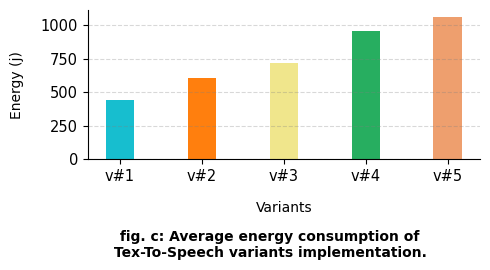

In [19]:
bar_colors = ['#17becf', '#ff7f0e', '#f0e68c', '#27ae60', '#ee9f6e']
 
schemas  = dfw['variant'].unique()

fig, ax = plt.subplots(figsize=(5, 2.8))  

ax.bar(
        dfw['variant'], dfw['mean_energys'], 
        width=0.35, 
        color=bar_colors
    )

ax = bar_ax_style(ax, "Energy (j)", "Variants")

ax.tick_params(axis='both', which='major', labelsize=10.5)

fig.suptitle(""" fig. c: Average energy consumption of \n Tex-To-Speech variants implementation. """
             , y=0, x=0.55, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
 
 

In [21]:
# Save data to CSV for gnuplot (e.g., tab-delimited)
dfw[['schema', 'mean_energys']].to_csv('energy_data.dat', sep='\t', index=False, header=False)